In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import load_model
import seaborn as sns
from keras.applications import ResNet152
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
!git clone https://github.com/BasilKhan07/FYP-2023.git

Cloning into 'FYP-2023'...
remote: Enumerating objects: 10203, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10203 (delta 0), reused 11 (delta 0), pack-reused 10191
Receiving objects: 100% (10203/10203), 1.59 GiB | 26.15 MiB/s, done.
Updating files: 100% (10155/10155), done.


In [ ]:
path_train = r'/content/FYP-2023/Dataset/Train'
path_test = r'/content/FYP-2023/Dataset/Test'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path_train, target_size=(224,224), class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(224,224), class_mode='categorical')

Found 8145 images belonging to 19 classes.
Found 2010 images belonging to 19 classes.


In [ ]:
# Define the ResNet-152 model with custom output layer
base_model = ResNet152(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
num_classes = 19  # Change this to the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)
model_resnet152 = Model(inputs=base_model.input, outputs=predictions)

234698864/234698864 [==============================] - 9s 0us/step


In [ ]:
# Compile the model
model_resnet152.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Assuming you have training and testing data generators (train_generator, test_generator)
# Train the model with a reduced number of epochs (10 in this case)
history_resnet152 = model_resnet152.fit(
   train,
  validation_data=test,
  epochs=10,
  steps_per_epoch=len(train),
  validation_steps=len(test)
)

Epoch 1/10
255/255 [==============================] - 352s 907ms/step - loss: 0.3329 - accuracy: 0.8952 - val_loss: 8.6625 - val_accuracy: 0.0388
Epoch 2/10
255/255 [==============================] - 226s 885ms/step - loss: 0.0827 - accuracy: 0.9732 - val_loss: 4.3109 - val_accuracy: 0.2194
Epoch 3/10
255/255 [==============================] - 226s 885ms/step - loss: 0.0501 - accuracy: 0.9853 - val_loss: 2.6938 - val_accuracy: 0.4025
Epoch 4/10
255/255 [==============================] - 225s 884ms/step - loss: 0.0843 - accuracy: 0.9747 - val_loss: 0.3425 - val_accuracy: 0.8960
Epoch 5/10
255/255 [==============================] - 225s 883ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.1556 - val_accuracy: 0.9627
Epoch 6/10
255/255 [==============================] - 224s 880ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.2379 - val_accuracy: 0.9338
Epoch 7/10
255/255 [==============================] - 225s 882ms/step - loss: 0.0268 - accuracy: 0.9936 - val_loss: 0.1606 -

In [ ]:
model_resnet152.save('Resnet_model.h5')
print("model saved to Disk.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model saved to Disk.


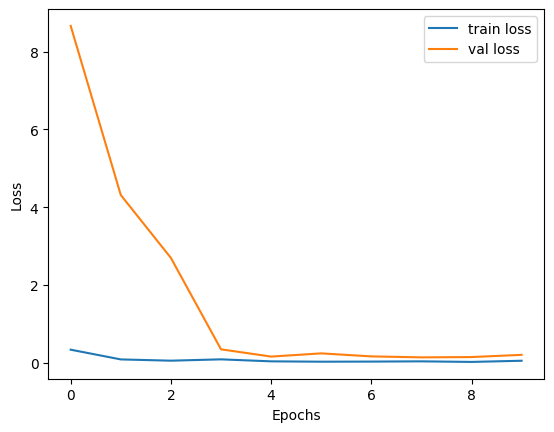

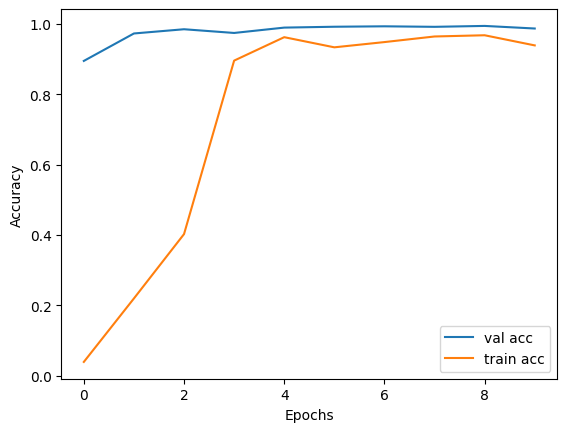

In [ ]:
#plot the loss
plt.plot(history_resnet152.history['loss'], label='train loss')
plt.plot(history_resnet152.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot the accuracy
plt.plot(history_resnet152.history['accuracy'], label='val acc')
plt.plot(history_resnet152.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#dirname = os.path.dirname(__file__)
model_new_resnet = load_model('Resnet_model.h5')
print("ResNet model loaded.")

ResNet model loaded.


In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    path_test,
     target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 2010 images belonging to 19 classes.


In [ ]:
predictions = model_new_resnet.predict(test_data_generator, steps=test_steps_per_epoch)

63/63 [==============================] - 28s 410ms/step


In [ ]:
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0 ... 18 18 18]
[ 0  0  0 ... 18 18 18]


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
print(class_labels)


['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged', 'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged', 'Tomato_old', 'Tomato_ripe', 'Tomato_unripe']


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report)
print(cmat)
print(acc)

                        precision    recall  f1-score   support

          Apple_blotch       0.96      0.67      0.79        64
         Apple_healthy       0.87      0.99      0.92       137
          Apple_rotten       0.81      0.99      0.89       136
            Apple_scab       1.00      0.83      0.91        42
           Banana_firm       0.98      0.98      0.98       148
 Banana_heavilybruised       0.96      0.94      0.95       136
Banana_slightlybruised       0.93      0.94      0.94       159
   GreenChilli_damaged       1.00      0.93      0.96        27
     GreenChilli_dried       1.00      1.00      1.00       100
       GreenChilli_old       0.98      0.96      0.97        52
      GreenChilli_ripe       0.88      0.95      0.92        40
    GreenChilli_unripe       0.96      0.96      0.96        45
       Orange_greening       0.87      1.00      0.93       136
        Orange_healthy       0.94      0.87      0.91        71
         Orange_rotten       0.99      

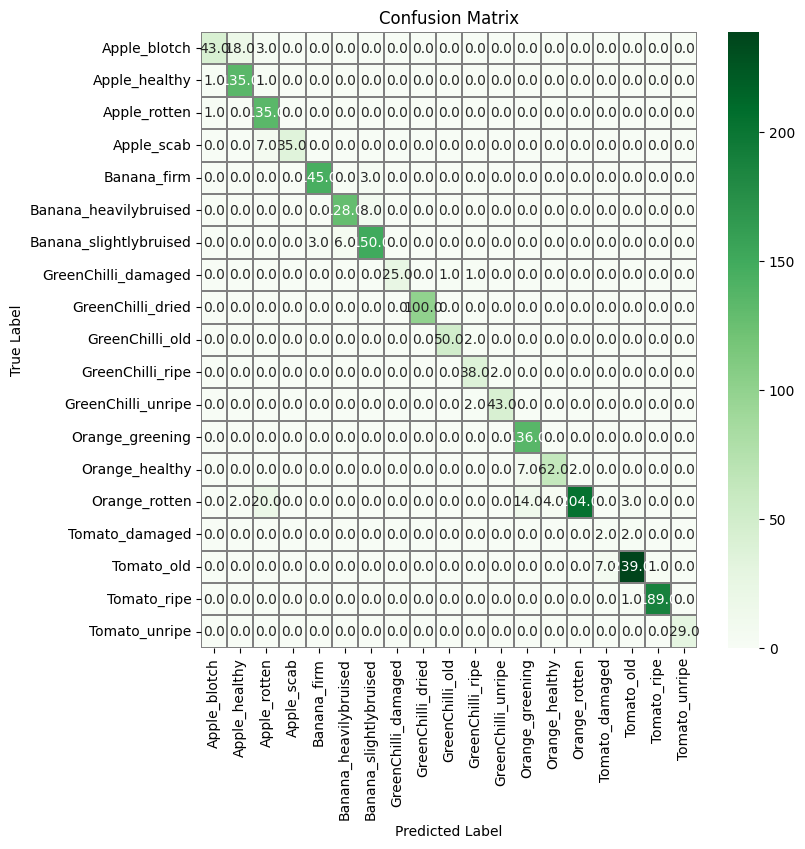

In [ ]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged', 'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged', 'Tomato_old', 'Tomato_ripe', 'Tomato_unripe'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged', 'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged', 'Tomato_old', 'Tomato_ripe', 'Tomato_unripe'])

plt.title("Confusion Matrix")
plt.show()

In [ ]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [ ]:
import pandas as pd
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(confusion_mtx)).transpose()
classes = ['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged', 'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged', 'Tomato_old', 'Tomato_ripe', 'Tomato_unripe']
df['CLASSES'] = classes
df.set_index('CLASSES', inplace=True)
df

,TPR,FNR,FPR,TNR
CLASSES,,,,
Apple_blotch,0.671875,0.328125,0.001028,0.998972
Apple_healthy,0.985401,0.014599,0.010678,0.989322
Apple_rotten,0.992647,0.007353,0.016542,0.983458
Apple_scab,0.833333,0.166667,0.000000,1.000000
Banana_firm,0.979730,0.020270,0.001611,0.998389
Banana_heavilybruised,0.941176,0.058824,0.003202,0.996798
Banana_slightlybruised,0.943396,0.056604,0.005943,0.994057
GreenChilli_damaged,0.925926,0.074074,0.000000,1.000000
GreenChilli_dried,1.000000,0.000000,0.000000,1.000000


In [ ]:
print("Resnet analysis: ")
print("TPR average: ",df["TPR"].mean())
print("FPR average: ",df["FPR"].mean())
print("TNR average: ",df["TNR"].mean())
print("FNR average: ",df["FNR"].mean())

Resnet analysis: 
TPR average:  0.9106356719839653
FPR average:  0.0034166199453268095
TNR average:  0.9965833800546733
FNR average:  0.0893643280160348
